In [137]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

import dmba

%matplotlib inline


In [138]:
excel_file_path = 'champ.xlsx'

# Specifying the sheet name
sheet_name = 'Data for Clustering'
# Reading the specific sheet into a DataFrame named sales_df
customers_df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
customers_df.head()




,Row Labels,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
0,A-11,2466,139.590,1.854e+05,1021,1445,0,0,0,0,0,0,0,0
1,A-6,131,2086.000,6.247e+03,0,0,25,106,0,0,0,0,0,0
2,A-9,18923,53625.654,1.592e+06,3585,0,175,714,11716,2116,617,0,0,0
3,B-2,624,202.899,1.481e+04,581,0,0,2,0,41,0,0,0,0
4,B-3,464,8451.562,5.863e+04,0,0,459,5,0,0,0,0,0,0


In [139]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Row Labels          45 non-null     object 
 1   Sum of QtyRequired  45 non-null     int64  
 2   Sum of TotalArea    45 non-null     float64
 3   Sum of Amount       45 non-null     float64
 4   DURRY               45 non-null     int64  
 5   HANDLOOM            45 non-null     int64  
 6   DOUBLE BACK         45 non-null     int64  
 7   JACQUARD            45 non-null     int64  
 8   HAND TUFTED         45 non-null     int64  
 9   HAND WOVEN          45 non-null     int64  
 10  KNOTTED             45 non-null     int64  
 11  GUN TUFTED          45 non-null     int64  
 12  Powerloom Jacquard  45 non-null     int64  
 13  INDO TEBETAN        45 non-null     int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 5.1+ KB


In [140]:
#set row names (index) to the utilities column (company) and remove it. 
customers_df.set_index('Row Labels', inplace=True)

# Convert all columns to 'float'. While this step is not required, the conversion of integer data to float will avoid a warning when 
# applying the scale function
customers_df = customers_df.apply(lambda x: x.astype('float64')) #lambda is used for custom functions. 
customers_df.head()

,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
Row Labels,,,,,,,,,,,,,
A-11,2466.0,139.590,1.854e+05,1021.0,1445.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A-6,131.0,2086.000,6.247e+03,0.0,0.0,25.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0
A-9,18923.0,53625.654,1.592e+06,3585.0,0.0,175.0,714.0,11716.0,2116.0,617.0,0.0,0.0,0.0
B-2,624.0,202.899,1.481e+04,581.0,0.0,0.0,2.0,0.0,41.0,0.0,0.0,0.0,0.0
B-3,464.0,8451.562,5.863e+04,0.0,0.0,459.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
d1 = np.round(pairwise.pairwise_distances(customers_df, metric='euclidean'),decimals=2)
pd.DataFrame(d1, columns=customers_df.index, index=customers_df.index).head(5)

Row Labels,A-11,A-6,A-9,B-2,B-3,B-4,C-1,C-2,C-3,CC,...,RC,S-2,S-3,T-2,T-4,T-5,T-6,T-9,TGT,V-1
Row Labels,,,,,,,,,,,,,,,,,,,,,
A-11,0.000e+00,1.792e+05,1.408e+06,1.706e+05,1.271e+05,1.592e+05,3.873e+05,1.373e+06,8.645e+04,3.903e+04,...,1.429e+05,1.287e+05,1.241e+05,3.777e+05,5.314e+04,551057.55,8.398e+04,1.847e+05,1.116e+07,1.377e+05
A-6,1.792e+05,0.000e+00,1.587e+06,8.802e+03,5.277e+04,2.004e+04,5.647e+05,1.552e+06,9.285e+04,1.416e+05,...,3.221e+05,5.055e+04,5.513e+04,5.569e+05,2.321e+05,729727.22,9.527e+04,5.868e+03,1.133e+07,4.155e+04
A-9,1.408e+06,1.587e+06,0.000e+00,1.578e+06,1.534e+06,1.567e+06,1.025e+06,7.625e+04,1.494e+06,1.445e+06,...,1.265e+06,1.536e+06,1.532e+06,1.030e+06,1.355e+06,860316.62,1.492e+06,1.592e+06,9.749e+06,1.545e+06
B-2,1.706e+05,8.802e+03,1.578e+06,0.000e+00,4.459e+04,1.185e+04,5.564e+05,1.544e+06,8.435e+04,1.331e+05,...,3.135e+05,4.196e+04,4.659e+04,5.483e+05,2.235e+05,721153.12,8.672e+04,1.408e+04,1.133e+07,3.295e+04
B-3,1.271e+05,5.277e+04,1.534e+06,4.459e+04,0.000e+00,3.281e+04,5.119e+05,1.500e+06,4.072e+04,8.921e+04,...,2.698e+05,8.259e+03,7.223e+03,5.045e+05,1.798e+05,677455.30,4.338e+04,5.848e+04,1.128e+07,1.355e+04


In [143]:
# Normalize the data columns
customers_df_norm = (customers_df - customers_df.mean()) / customers_df.std()
customers_df_norm.head()

,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
Row Labels,,,,,,,,,,,,,
A-11,-0.344,-0.375,-0.283,-0.274,2.073,-0.350,-0.509,-0.368,-0.359,-0.243,-0.238,-0.149,-0.207
A-6,-0.420,-0.318,-0.383,-0.321,-0.305,-0.328,0.094,-0.368,-0.359,-0.243,-0.238,-0.149,-0.207
A-9,0.195,1.177,0.494,-0.159,-0.305,-0.200,3.553,0.813,0.516,0.167,-0.238,-0.149,-0.207
B-2,-0.404,-0.373,-0.378,-0.294,-0.305,-0.350,-0.497,-0.368,-0.342,-0.243,-0.238,-0.149,-0.207
B-3,-0.410,-0.134,-0.354,-0.321,-0.305,0.044,-0.480,-0.368,-0.359,-0.243,-0.238,-0.149,-0.207


### Single Linkage

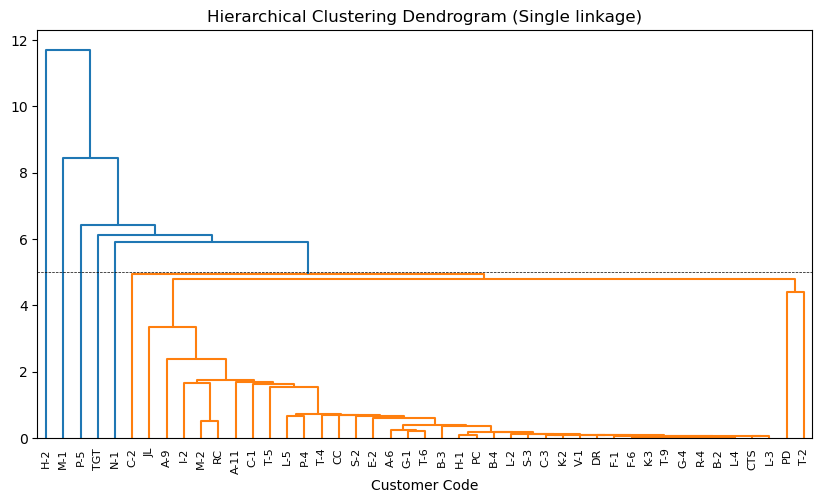

In [144]:
#Use one of the following methods: 'single', 'average','ward','complete','centroid'
Z = linkage(customers_df_norm, method='single') 

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Customer Code')
# 'color_threshold = 2.5' represents the threthold of cluster development. 
# It is a normalized dinstance between clusters (2.5), at which the agglomeration of records into clusters will stop. 
# The higher this value, the less clusters will be created. 
dendrogram(Z, labels=customers_df_norm.index, color_threshold=5)
plt.axhline(y=5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [145]:
memb = fcluster(Z, 6, criterion='maxclust') #no more than 6 clusters
#The above variable has membership of each row. To make it presentable we reorganize next
memb = pd.Series(memb, index=customers_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  A-11, A-6, A-9, B-2, B-3, B-4, C-1, C-2, C-3, CC, CTS, DR, E-2, F-1, F-6, G-1, G-4, H-1, I-2, JL, K-2, K-3, L-2, L-3, L-4, L-5, M-2, P-4, PC, PD, R-4, RC, S-2, S-3, T-2, T-4, T-5, T-6, T-9, V-1
2 :  N-1
3 :  TGT
4 :  P-5
5 :  M-1
6 :  H-2


In [146]:
customers_df_norm.index = ['{}: {}'.format(cluster, customer) for cluster, customer in zip(memb, customers_df.index)]

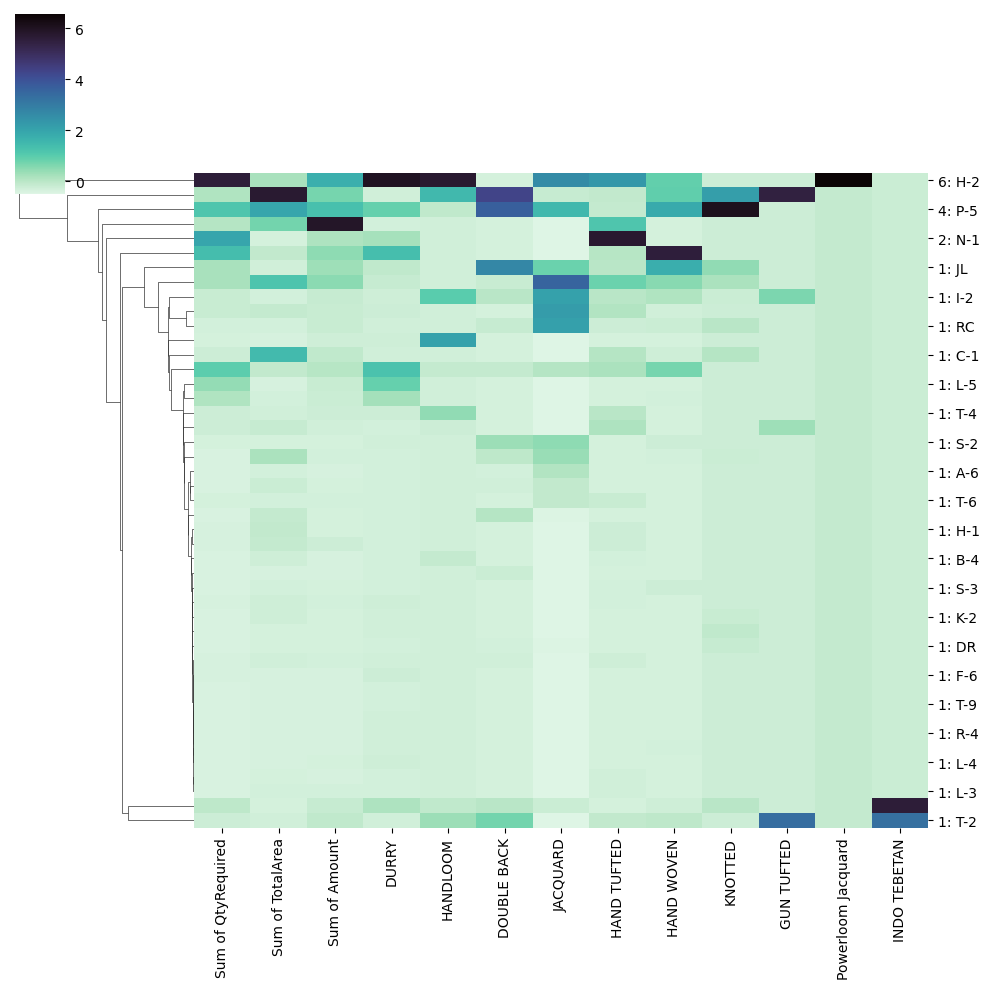

In [147]:
#Cluster map (aka Heat map)
sns.clustermap(customers_df_norm, method='single', col_cluster=False,  cmap="mako_r") #mako_r is a commonly used color palette for Heatmaps. 'rocket' is another common one
plt.show()

In [148]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
clust_mean = customers_df.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean.index]
pd.set_option('display.precision', 3)

# Display the data frame with mean values and cluster titles.
print('Means of Input Variables for Clusters with Single Linkage Method')
clust_mean

Means of Input Variables for Clusters with Single Linkage Method


,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN,Cluster
1,6195.725,6002.479,2.574e+05,3535.125,86.325,205.65,76.525,1422.425,690.525,83.275,4.275,0.0,0.8,Cluster 1
2,72888.000,919.651,9.494e+05,12203.000,0.000,0.00,0.000,60685.000,0.000,0.000,0.000,0.0,0.0,Cluster 2
3,15045.000,37630.332,1.134e+07,0.000,0.000,0.00,0.000,15045.000,0.000,0.000,0.000,0.0,0.0,Cluster 3
4,48373.000,79666.791,3.067e+06,25997.000,138.000,4691.00,353.000,2352.000,5340.000,9502.000,0.000,0.0,0.0,Cluster 4
5,16649.000,209725.222,1.960e+06,412.000,1085.000,5439.00,60.000,2697.000,3085.000,3626.000,195.000,0.0,0.0,Cluster 5
6,183206.000,19505.396,3.805e+06,139618.000,3673.000,0.00,550.000,26612.000,3000.000,0.000,0.000,9753.0,0.0,Cluster 6


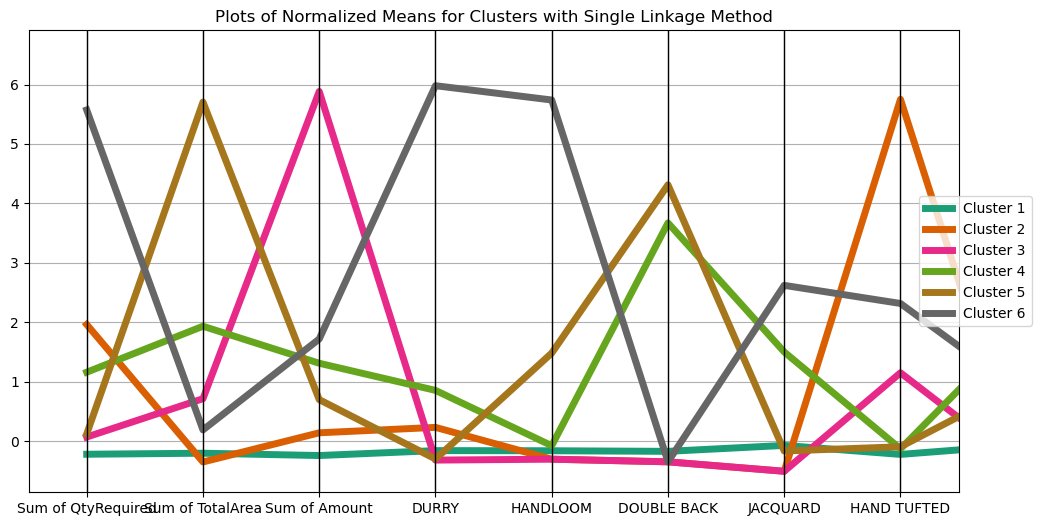

In [149]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
customers_df_norm.index = customers_df.index
clust_mean_norm = customers_df_norm.groupby(memb).mean()
# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
clust_mean_norm

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Single Linkage Method')
plt.show()

In [44]:
#Use one of the following methods: 'single', 'average','ward','complete','centroid'

### Complete Linkage

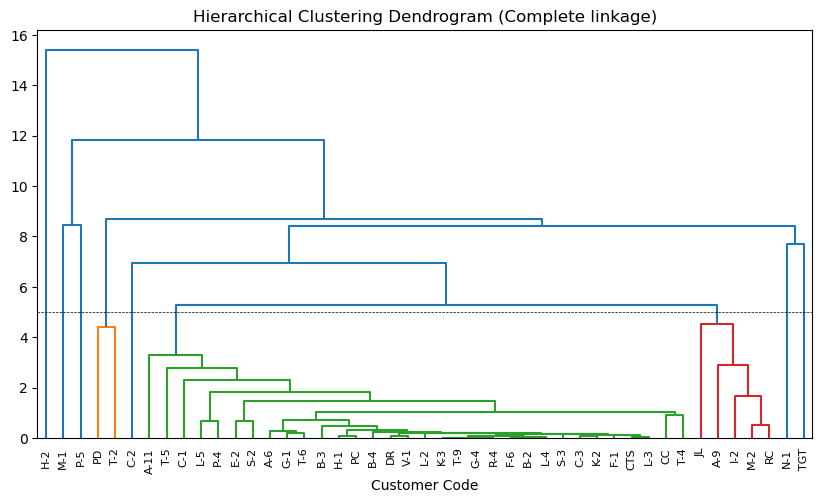

In [150]:
#Use one of the following methods: 'single', 'average','ward','complete','centroid'
Z = linkage(customers_df_norm, method='complete') 

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('Customer Code')
# 'color_threshold = 2.5' represents the threthold of cluster development. 
# It is a normalized dinstance between clusters (2.5), at which the agglomeration of records into clusters will stop. 
# The higher this value, the less clusters will be created. 
dendrogram(Z, labels=customers_df_norm.index, color_threshold=5)
plt.axhline(y=5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [151]:
memb = fcluster(Z, 9, criterion='maxclust') #no more than 6 clusters
#The above variable has membership of each row. To make it presentable we reorganize next
memb = pd.Series(memb, index=customers_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  M-1
2 :  P-5
3 :  PD, T-2
4 :  A-11, A-6, B-2, B-3, B-4, C-1, C-3, CC, CTS, DR, E-2, F-1, F-6, G-1, G-4, H-1, K-2, K-3, L-2, L-3, L-4, L-5, P-4, PC, R-4, S-2, S-3, T-4, T-5, T-6, T-9, V-1
5 :  A-9, I-2, JL, M-2, RC
6 :  C-2
7 :  N-1
8 :  TGT
9 :  H-2


In [152]:
customers_df_norm.index = ['{}: {}'.format(cluster, customer) for cluster, customer in zip(memb, customers_df.index)]

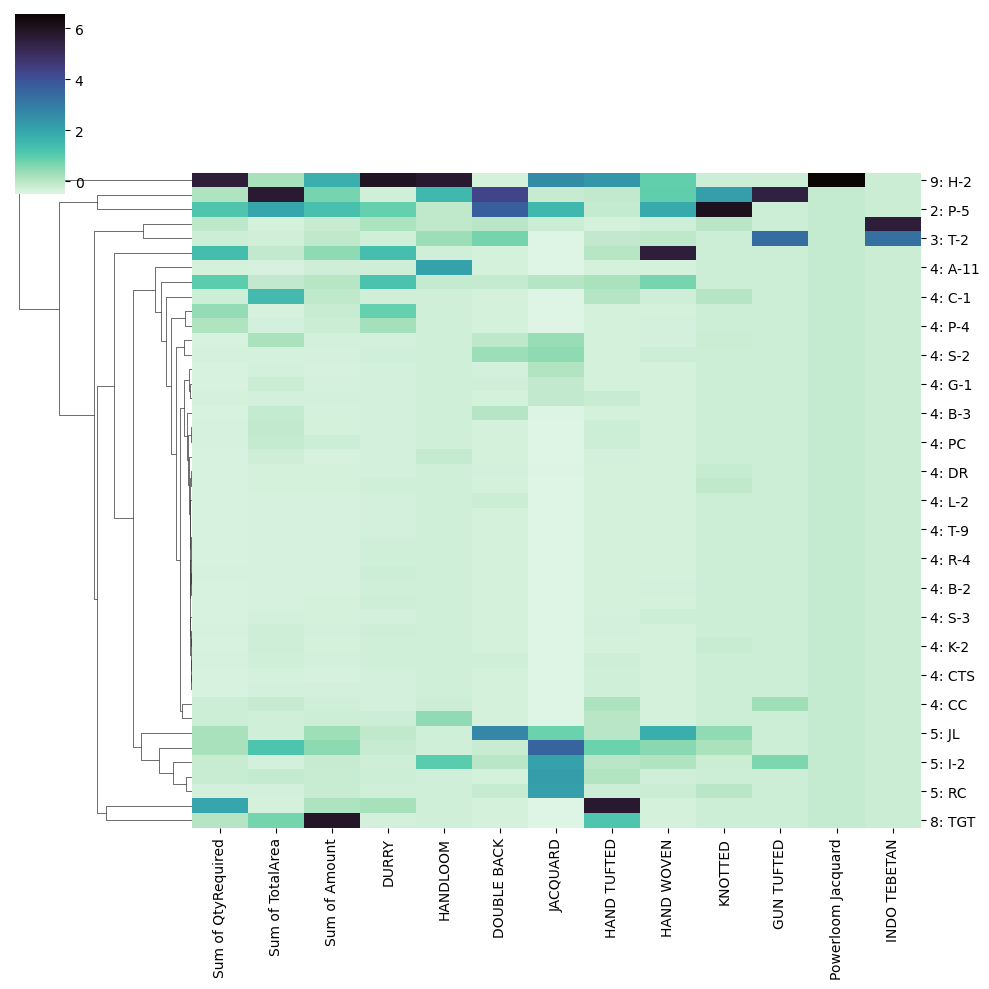

In [153]:
#Cluster map (aka Heat map)
sns.clustermap(customers_df_norm, method='complete', col_cluster=False,  cmap="mako_r") #mako_r is a commonly used color palette for Heatmaps. 'rocket' is another common one
plt.show()

In [154]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
clust_mean = customers_df.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean.index]
pd.set_option('display.precision', 3)

# Display the data frame with mean values and cluster titles.
print('Means of Input Variables for Clusters with Complete Linkage Method')
clust_mean

Means of Input Variables for Clusters with Complete Linkage Method


,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN,Cluster
1,16649.000,209725.222,1.960e+06,412.000,1085.000,5439.000,60.00,2697.000,3085.000,3626.000,195.000,0.0,0.0,Cluster 1
2,48373.000,79666.791,3.067e+06,25997.000,138.000,4691.000,353.00,2352.000,5340.000,9502.000,0.000,0.0,0.0,Cluster 2
3,8307.000,1579.888,4.838e+05,5124.500,264.000,828.000,25.00,1318.000,476.500,194.000,61.000,0.0,16.0,Cluster 3
4,3775.312,4975.495,1.206e+05,2557.656,66.781,68.312,21.25,811.875,109.438,27.938,0.594,0.0,0.0,Cluster 4
5,11046.600,13642.705,7.826e+05,2453.800,157.600,876.800,466.20,4893.000,1770.400,409.800,6.000,0.0,0.0,Cluster 5
6,55172.000,9510.000,1.557e+06,37042.000,0.000,0.000,0.00,3816.000,14314.000,0.000,0.000,0.0,0.0,Cluster 6
7,72888.000,919.651,9.494e+05,12203.000,0.000,0.000,0.00,60685.000,0.000,0.000,0.000,0.0,0.0,Cluster 7
8,15045.000,37630.332,1.134e+07,0.000,0.000,0.000,0.00,15045.000,0.000,0.000,0.000,0.0,0.0,Cluster 8
9,183206.000,19505.396,3.805e+06,139618.000,3673.000,0.000,550.00,26612.000,3000.000,0.000,0.000,9753.0,0.0,Cluster 9


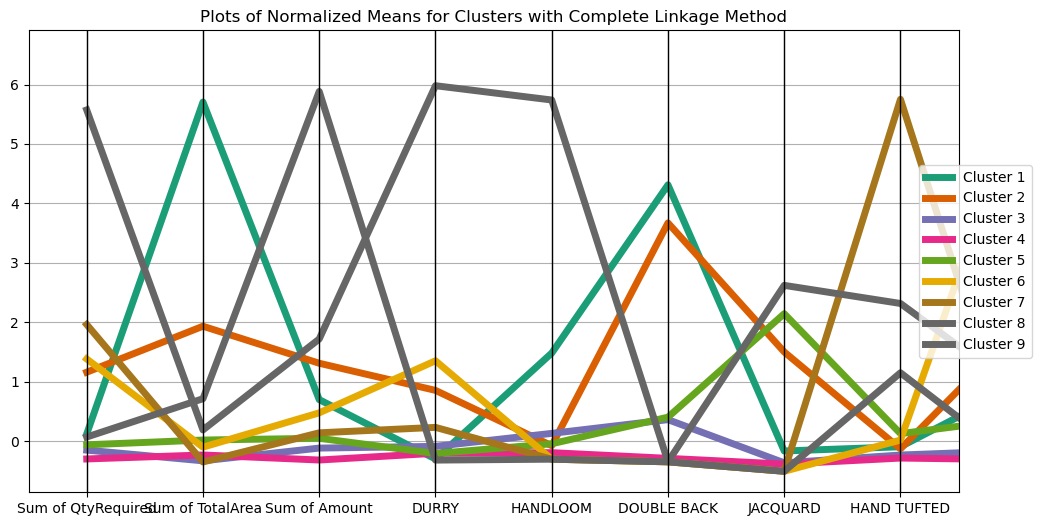

In [155]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
customers_df_norm.index = customers_df.index
clust_mean_norm = customers_df_norm.groupby(memb).mean()
# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
clust_mean_norm

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Complete Linkage Method')
plt.show()

### Average Linkage

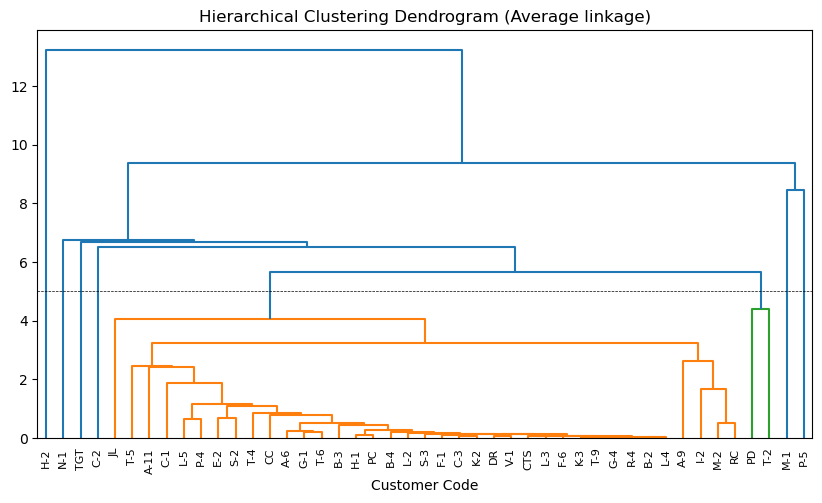

In [156]:
#Use one of the following methods: 'single', 'average','ward','complete','centroid'
Z = linkage(customers_df_norm, method='average') 

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('Customer Code')
# 'color_threshold = 2.5' represents the threthold of cluster development. 
# It is a normalized dinstance between clusters (2.5), at which the agglomeration of records into clusters will stop. 
# The higher this value, the less clusters will be created. 
dendrogram(Z, labels=customers_df_norm.index, color_threshold=5)
plt.axhline(y=5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [157]:
memb = fcluster(Z, 8, criterion='maxclust') #no more than 6 clusters
#The above variable has membership of each row. To make it presentable we reorganize next
memb = pd.Series(memb, index=customers_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  A-11, A-6, A-9, B-2, B-3, B-4, C-1, C-3, CC, CTS, DR, E-2, F-1, F-6, G-1, G-4, H-1, I-2, JL, K-2, K-3, L-2, L-3, L-4, L-5, M-2, P-4, PC, R-4, RC, S-2, S-3, T-4, T-5, T-6, T-9, V-1
2 :  PD, T-2
3 :  C-2
4 :  TGT
5 :  N-1
6 :  M-1
7 :  P-5
8 :  H-2


In [158]:
customers_df_norm.index = ['{}: {}'.format(cluster, customer) for cluster, customer in zip(memb, customers_df.index)]

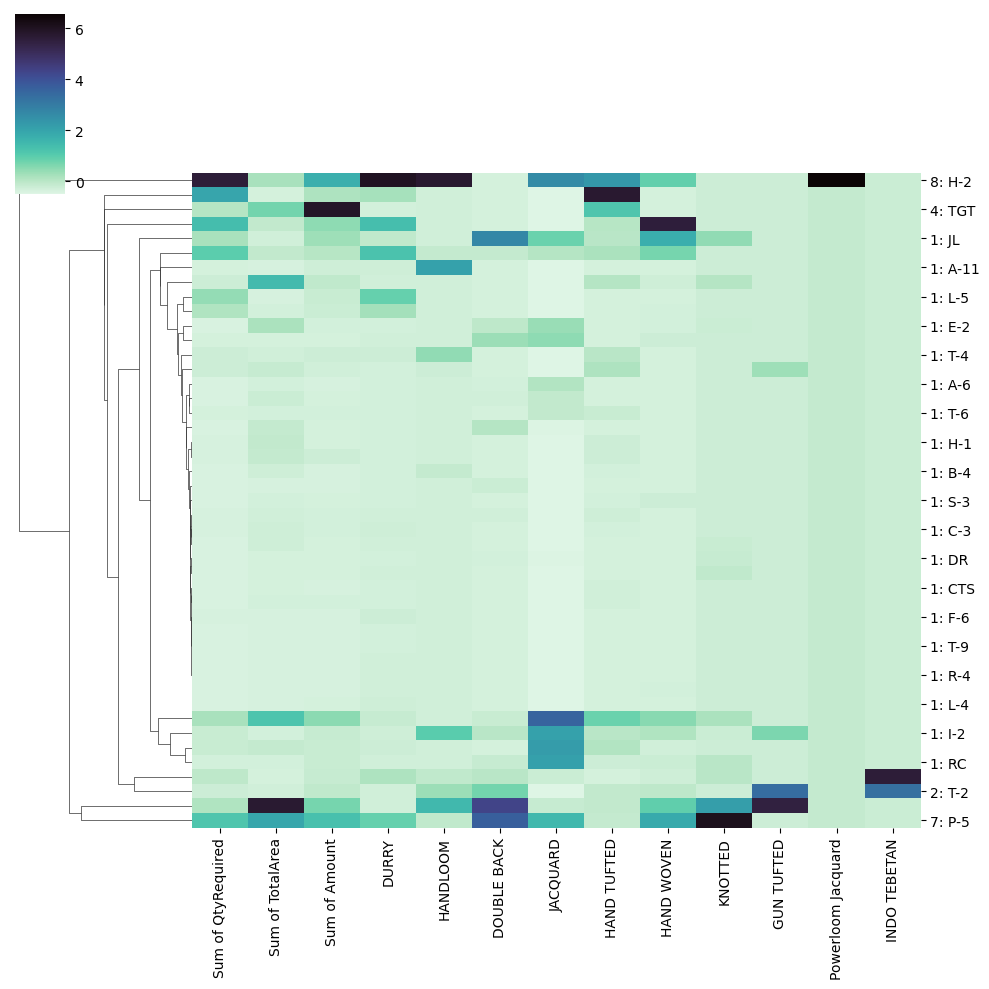

In [116]:
#Cluster map (aka Heat map)
sns.clustermap(customers_df_norm, method='average', col_cluster=False,  cmap="mako_r") #mako_r is a commonly used color palette for Heatmaps. 'rocket' is another common one
plt.show()

In [159]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
clust_mean = customers_df.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean.index]
pd.set_option('display.precision', 3)

# Display the data frame with mean values and cluster titles.
print('Means of Input Variables for Clusters with Average Linkage Method')
clust_mean

Means of Input Variables for Clusters with Average Linkage Method


,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN,Cluster
1,4757.919,6146.740,2.101e+05,2543.622,79.054,177.568,81.378,1363.378,333.892,79.541,1.324,0.0,0.0,Cluster 1
2,8307.000,1579.888,4.838e+05,5124.500,264.000,828.000,25.000,1318.000,476.500,194.000,61.000,0.0,16.0,Cluster 2
3,55172.000,9510.000,1.557e+06,37042.000,0.000,0.000,0.000,3816.000,14314.000,0.000,0.000,0.0,0.0,Cluster 3
4,15045.000,37630.332,1.134e+07,0.000,0.000,0.000,0.000,15045.000,0.000,0.000,0.000,0.0,0.0,Cluster 4
5,72888.000,919.651,9.494e+05,12203.000,0.000,0.000,0.000,60685.000,0.000,0.000,0.000,0.0,0.0,Cluster 5
6,16649.000,209725.222,1.960e+06,412.000,1085.000,5439.000,60.000,2697.000,3085.000,3626.000,195.000,0.0,0.0,Cluster 6
7,48373.000,79666.791,3.067e+06,25997.000,138.000,4691.000,353.000,2352.000,5340.000,9502.000,0.000,0.0,0.0,Cluster 7
8,183206.000,19505.396,3.805e+06,139618.000,3673.000,0.000,550.000,26612.000,3000.000,0.000,0.000,9753.0,0.0,Cluster 8


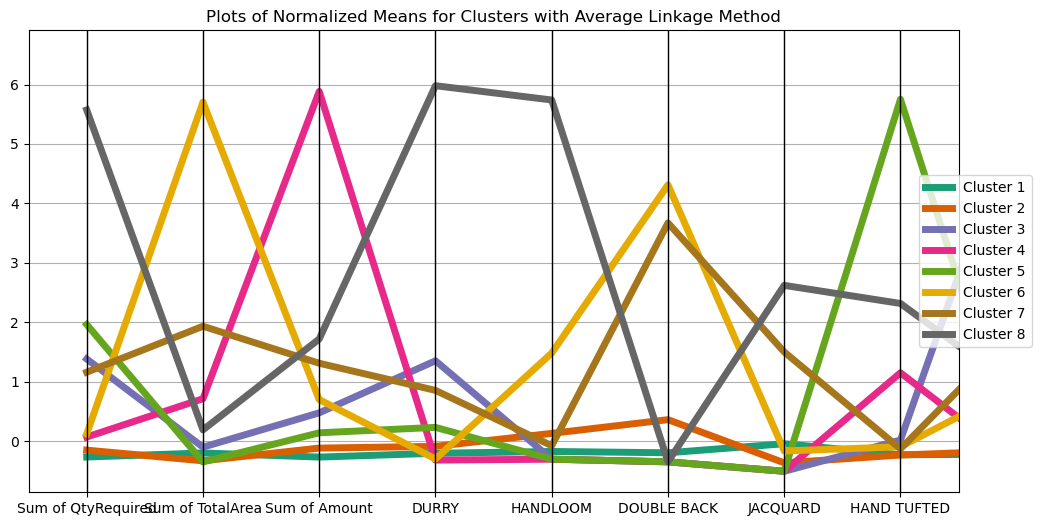

In [160]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
customers_df_norm.index = customers_df.index
clust_mean_norm = customers_df_norm.groupby(memb).mean()
# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
clust_mean_norm

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Average Linkage Method')
plt.show()

### Ward Linkage

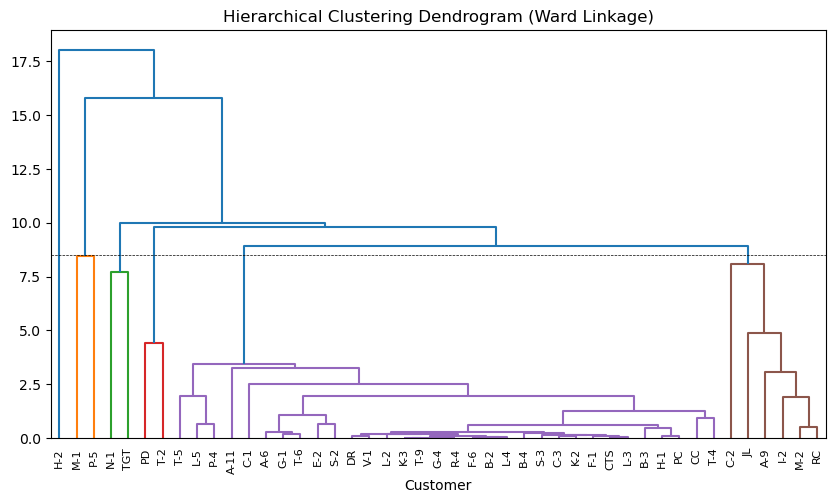

In [161]:
#Use one of the following methods: 'single', 'average','ward','complete','centroid'
Z = linkage(customers_df_norm, method='ward', metric = 'euclidean') 

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Customer')
# 'color_threshold = 2.5' represents the threthold of cluster development. 
# It is a normalized dinstance between clusters (2.5), at which the agglomeration of records into clusters will stop. 
# The higher this value, the less clusters will be created. 
dendrogram(Z, labels=customers_df_norm.index, color_threshold=8.5)
plt.axhline(y=8.5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [162]:
memb = fcluster(Z, 6, criterion='maxclust') #no more than 6 clusters
#The above variable has membership of each row. To make it presentable we reorganize next
memb = pd.Series(memb, index=customers_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  M-1, P-5
2 :  N-1, TGT
3 :  PD, T-2
4 :  A-11, A-6, B-2, B-3, B-4, C-1, C-3, CC, CTS, DR, E-2, F-1, F-6, G-1, G-4, H-1, K-2, K-3, L-2, L-3, L-4, L-5, P-4, PC, R-4, S-2, S-3, T-4, T-5, T-6, T-9, V-1
5 :  A-9, C-2, I-2, JL, M-2, RC
6 :  H-2


In [163]:
customers_df_norm.index = ['{}: {}'.format(cluster, customer) for cluster, customer in zip(memb, customers_df.index)]

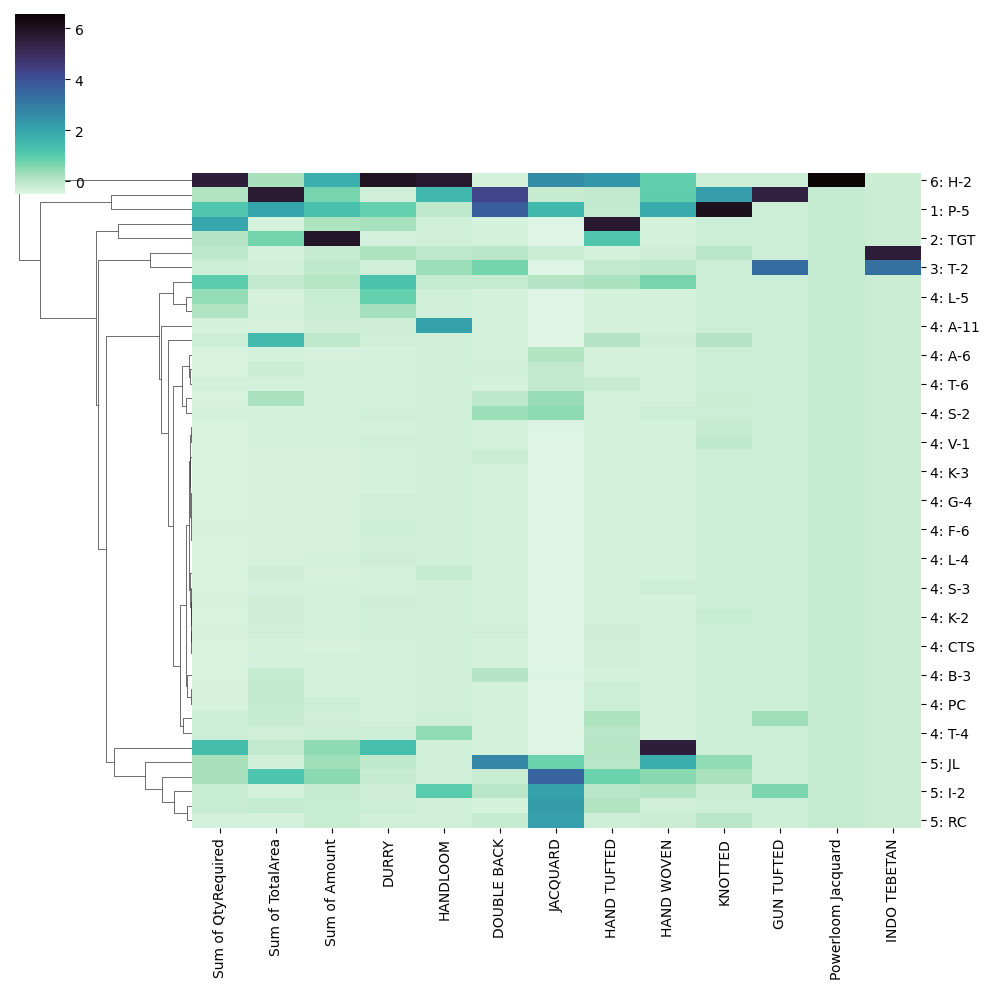

In [164]:
#Cluster map (aka Heat map)
sns.clustermap(customers_df_norm, method='ward', col_cluster=False,  cmap="mako_r") #mako_r is a commonly used color palette for Heatmaps. 'rocket' is another common one
plt.show()

In [165]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
clust_mean = customers_df.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean.index]
pd.set_option('display.precision', 3)

# Display the data frame with mean values and cluster titles.
print('Means of Input Variables for Clusters with Ward Linkage Method')
clust_mean

Means of Input Variables for Clusters with Ward Linkage Method


,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN,Cluster
1,32511.000,144696.006,2.513e+06,13204.500,611.500,5065.000,206.50,2524.500,4212.500,6564.000,97.500,0.0,0.0,Cluster 1
2,43966.500,19274.991,6.145e+06,6101.500,0.000,0.000,0.00,37865.000,0.000,0.000,0.000,0.0,0.0,Cluster 2
3,8307.000,1579.888,4.838e+05,5124.500,264.000,828.000,25.00,1318.000,476.500,194.000,61.000,0.0,16.0,Cluster 3
4,3775.312,4975.495,1.206e+05,2557.656,66.781,68.312,21.25,811.875,109.438,27.938,0.594,0.0,0.0,Cluster 4
5,18400.833,12953.920,9.117e+05,8218.500,131.333,730.667,388.50,4713.500,3861.000,341.500,5.000,0.0,0.0,Cluster 5
6,183206.000,19505.396,3.805e+06,139618.000,3673.000,0.000,550.00,26612.000,3000.000,0.000,0.000,9753.0,0.0,Cluster 6


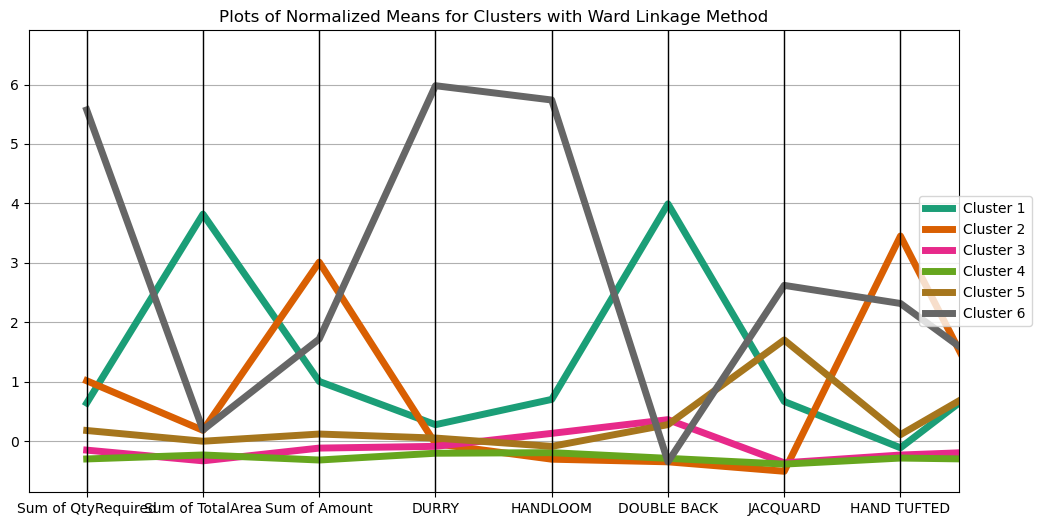

In [166]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
customers_df_norm.index = customers_df.index
clust_mean_norm = customers_df_norm.groupby(memb).mean()
# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
clust_mean_norm

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Ward Linkage Method')
plt.show()

### Centroid 

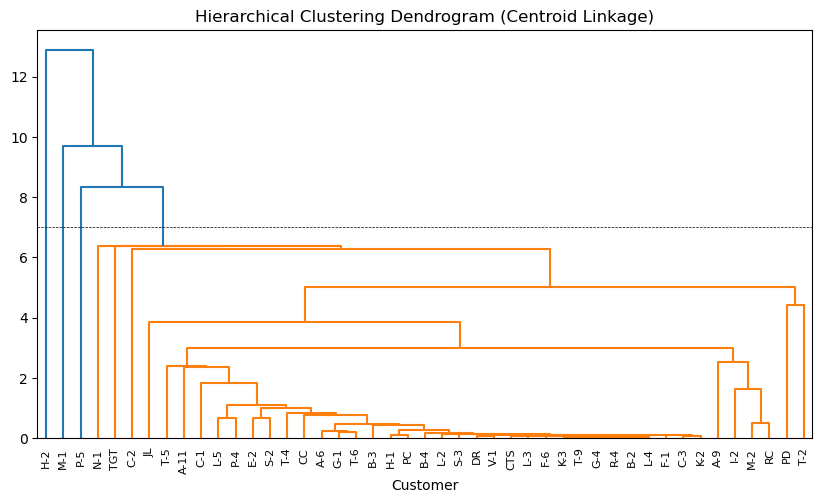

In [167]:
#Use one of the following methods: 'single', 'average','ward','complete','centroid'
Z = linkage(customers_df_norm, method='centroid') 

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
plt.title('Hierarchical Clustering Dendrogram (Centroid Linkage)')
plt.xlabel('Customer')
# 'color_threshold = 2.5' represents the threthold of cluster development. 
# It is a normalized dinstance between clusters (2.5), at which the agglomeration of records into clusters will stop. 
# The higher this value, the less clusters will be created. 
dendrogram(Z, labels=customers_df_norm.index, color_threshold=7)
plt.axhline(y=7, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [168]:
memb = fcluster(Z, 4, criterion='maxclust') #no more than 6 clusters
#The above variable has membership of each row. To make it presentable we reorganize next
memb = pd.Series(memb, index=customers_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  A-11, A-6, A-9, B-2, B-3, B-4, C-1, C-2, C-3, CC, CTS, DR, E-2, F-1, F-6, G-1, G-4, H-1, I-2, JL, K-2, K-3, L-2, L-3, L-4, L-5, M-2, N-1, P-4, PC, PD, R-4, RC, S-2, S-3, T-2, T-4, T-5, T-6, T-9, TGT, V-1
2 :  P-5
3 :  M-1
4 :  H-2


In [169]:
customers_df_norm.index = ['{}: {}'.format(cluster, customer) for cluster, customer in zip(memb, customers_df.index)]

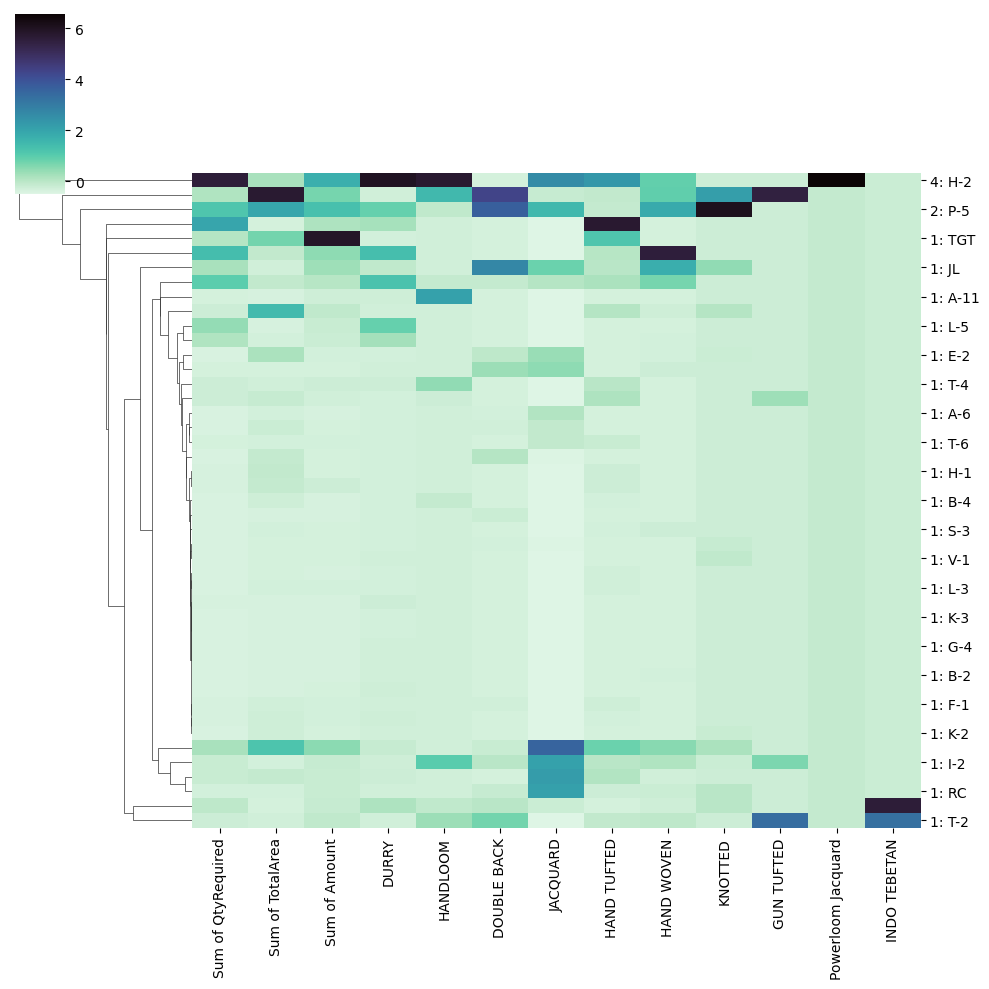

In [170]:
#Cluster map (aka Heat map)
sns.clustermap(customers_df_norm, method='centroid', col_cluster=False,  cmap="mako_r") #mako_r is a commonly used color palette for Heatmaps. 'rocket' is another common one
plt.show()

In [171]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
clust_mean = customers_df.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean.index]
pd.set_option('display.precision', 3)

# Display the data frame with mean values and cluster titles.
print('Means of Input Variables for Clusters with Centroid Linkage Method')
clust_mean

Means of Input Variables for Clusters with Centroid Linkage Method


,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN,Cluster
1,7994.333,6634.503,5.378e+05,3657.333,82.214,195.857,72.881,3157.786,657.643,79.31,4.071,0.0,0.762,Cluster 1
2,48373.000,79666.791,3.067e+06,25997.000,138.000,4691.000,353.000,2352.000,5340.000,9502.00,0.000,0.0,0.000,Cluster 2
3,16649.000,209725.222,1.960e+06,412.000,1085.000,5439.000,60.000,2697.000,3085.000,3626.00,195.000,0.0,0.000,Cluster 3
4,183206.000,19505.396,3.805e+06,139618.000,3673.000,0.000,550.000,26612.000,3000.000,0.00,0.000,9753.0,0.000,Cluster 4


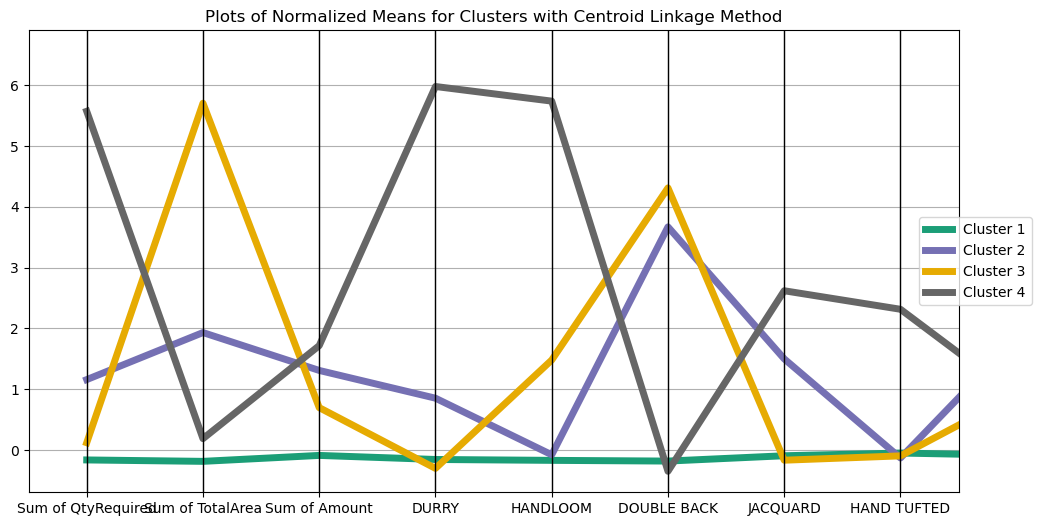

In [172]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
customers_df_norm.index = customers_df.index
clust_mean_norm = customers_df_norm.groupby(memb).mean()
# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
clust_mean_norm

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Centroid Linkage Method')
plt.show()